<div class="alert alert-block alert-success">

### Seaborn Highlights


- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.

---
<div class="alert alert-block alert-info">
    
### Import statements

In [1]:
# pandas for tabular data manipulation
import pandas as pd
# numpy for vectorized matrix operations
import numpy as np
# matplotlib.pyplot for basic matplotlib functionality
import matplotlib.pyplot as plt
# import seaborn:
import seaborn as sns

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

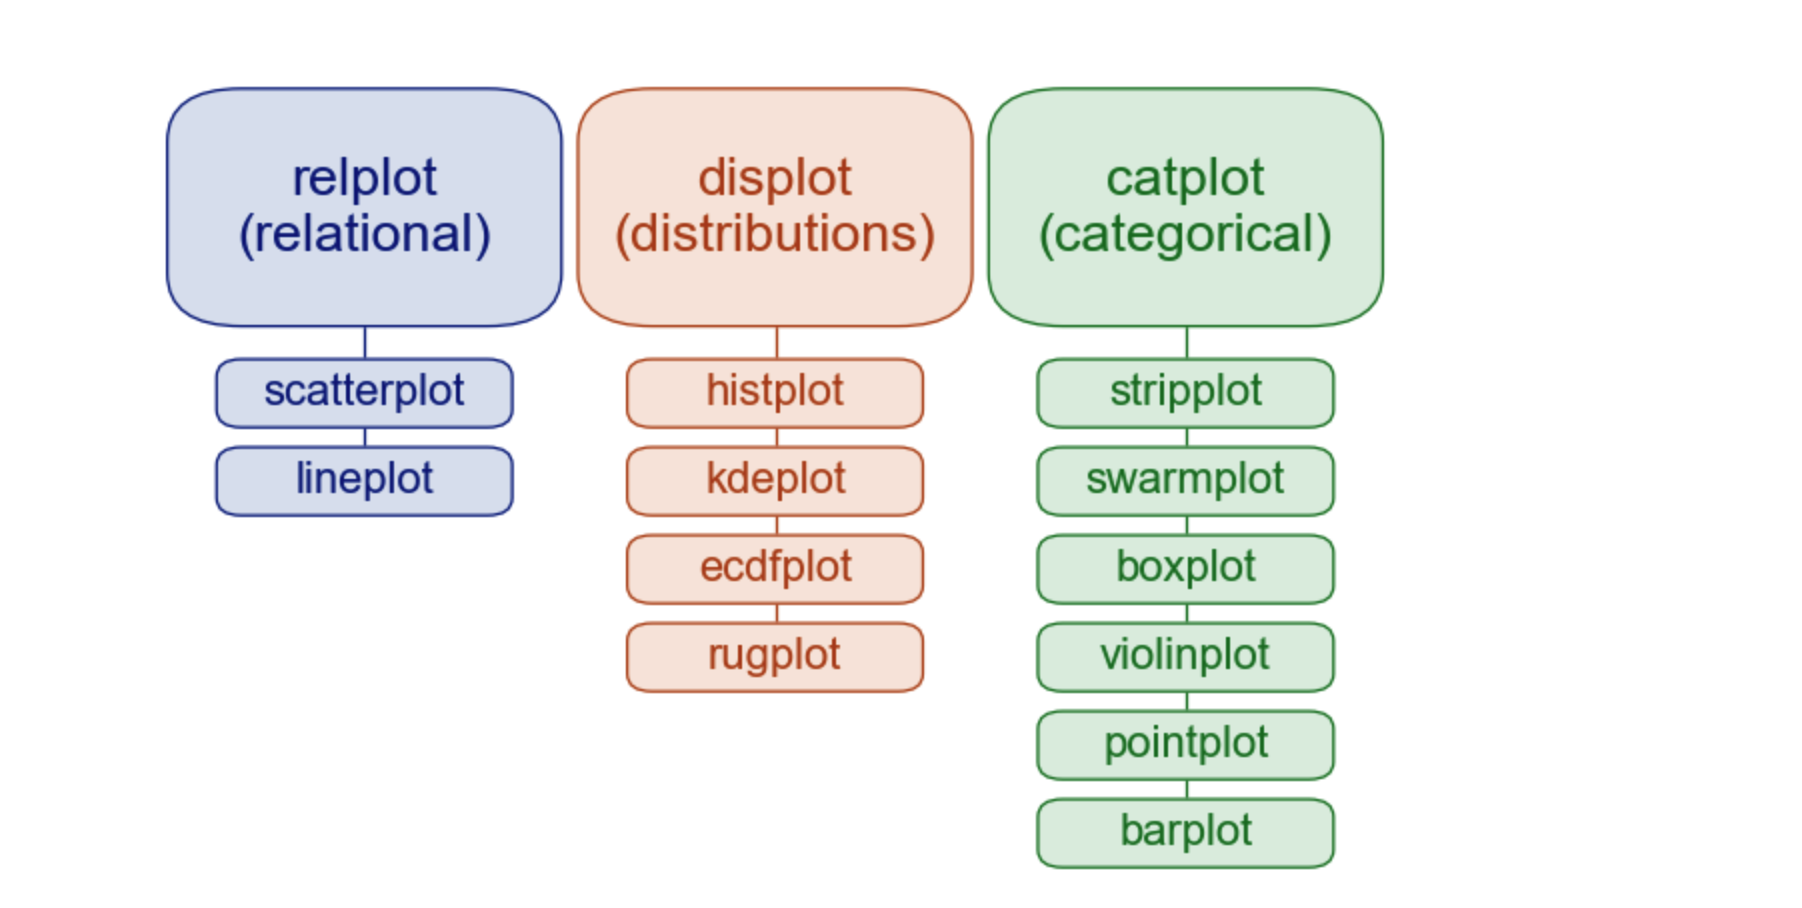

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [3]:
# Option 1 : Load directly from sns dataset using load_dataset
mpg = sns.load_dataset('mpg')

In [8]:
len(mpg.columns)

9

In [ ]:
# If we grab this data from pydataset note that its
# a little bit different!
from pydataset import data

mpg2 = data('mpg')

In [9]:
len(mpg2.columns) == len(mpg.columns)

False

In [11]:
# look for all datasets available in seaborn
# sns.get_dataset_names()

---
<div class="alert alert-block alert-info">
    
### **Relational Plots**

In [12]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


Let's make a scatter plot the way we learned before, with matplotlib:

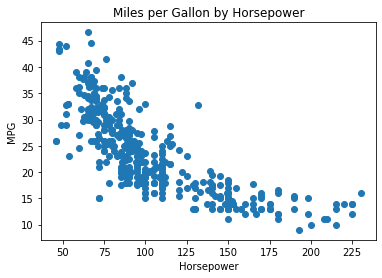

In [14]:
# scatterplot in matplotlib
plt.scatter(mpg.horsepower, mpg.mpg)
plt.title('Miles per Gallon by Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

Now let's use one using seaborn's relplot

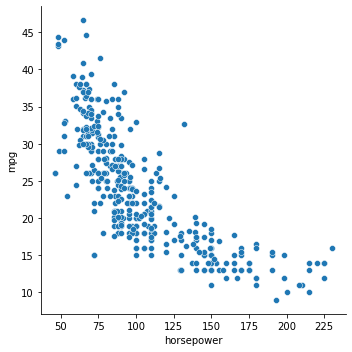

In [17]:
# Explore relationship between total_bill and tip using relplot
# instead of two series,
# Specify your data
# specify the strings that represent your x and y
sns.relplot(data=mpg, x='horsepower', y='mpg');

---
<div class="alert alert-block alert-info">
    
### Extra dimension: Hue

In [18]:
mpg.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

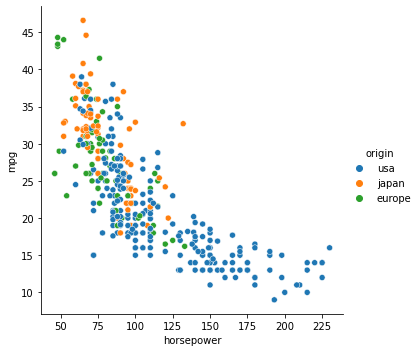

In [19]:
sns.relplot(data=mpg, x='horsepower', y='mpg', hue='origin')

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

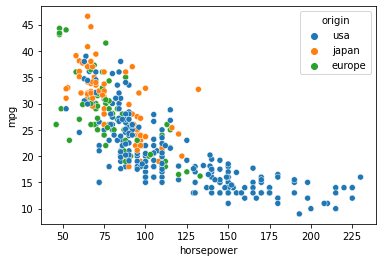

In [20]:
# getting the axis level version:
sns.scatterplot(data=mpg, x='horsepower', y='mpg', hue='origin')


In [21]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [22]:
mpg.model_year.value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

In [23]:
# lets make a decade column:
mpg['decade'] = mpg.model_year.apply(
    lambda x: str(x)[0]+'0\'s')

In [24]:
mpg.decade.value_counts()

70's    309
80's     89
Name: decade, dtype: int64

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

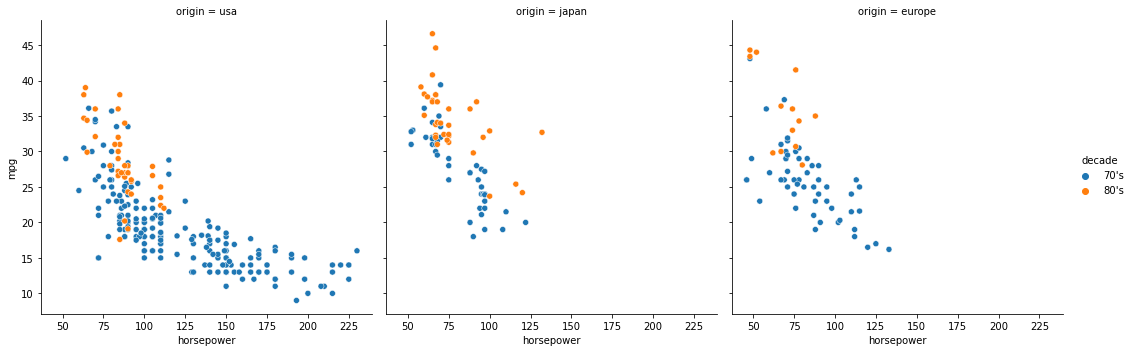

In [26]:
sns.relplot(
    data=mpg,
    x='horsepower',
    y='mpg',
    hue='decade',
    col='origin')

In [ ]:
# Takeaways:
# It looks like high horsepower vehicles were popular in the 
# 70's and waned in popularity in the 80's
# 
# mpg focused vehicles appear to be more prominent in the 80's
# USA appears to be the largest outputter of 
# High Horsepower/Low MPG vehicles in the 70's
# (seems like the muscle car market)

---
<div class="alert alert-block alert-info">
    
### Extra Dimension: **Style**

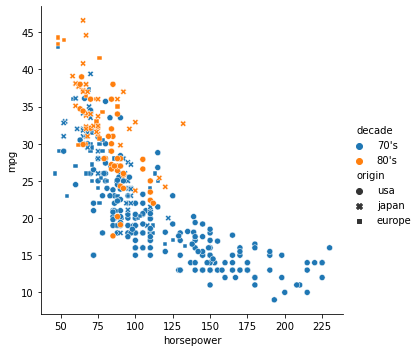

In [30]:
sns.relplot(
    data=mpg,
    x='horsepower',
    y='mpg',
    hue='decade',
    style='origin')
plt.show()

In [35]:
sns.relplot?

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

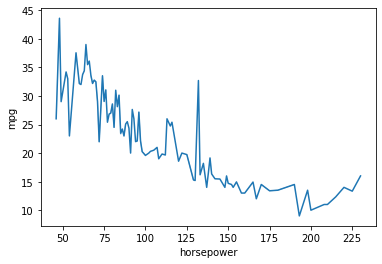

In [40]:
# lineplot - may not be appropriate in this case. Note use of 'kind' argument
sns.lineplot(
data=mpg,
x='horsepower',
y='mpg',
ci=False)

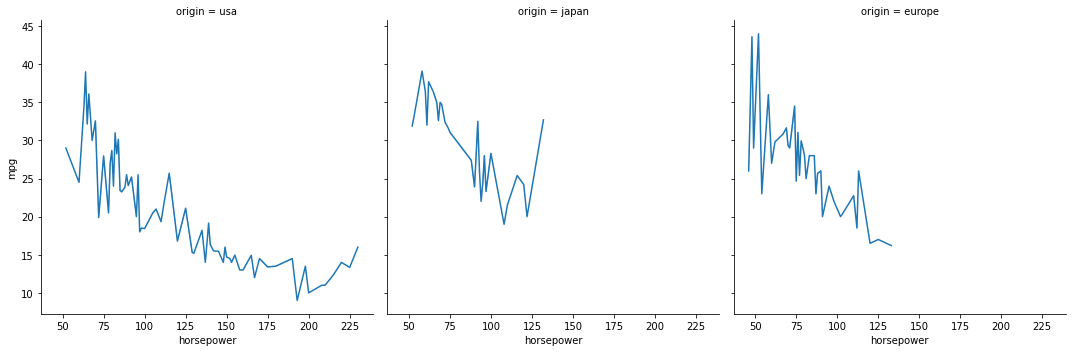

In [38]:
sns.relplot(
data=mpg,
x='horsepower',
y='mpg',
kind='line',
ci=False,
col='origin')

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


---
<div class="alert alert-block alert-info">
    
### **Distribution Plots**

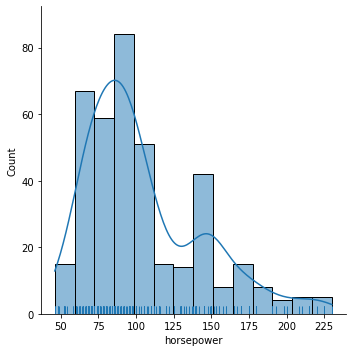

In [42]:
sns.displot(
data=mpg,
x='horsepower',
kde=True,
rug=True)

In [ ]:
# kde = probability of finding a observartions at particular 
# value of x.
# Smooth out version of histogram. 
# Estimating probabilty density function (PDF) 
# in a non-parametric way.


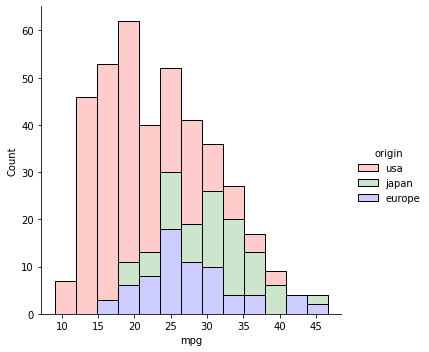

In [48]:
# histogram with hue and stacking
sns.displot(
data=mpg,
x='mpg',
hue='origin',
palette=['r','g','b'],
multiple='stack',
alpha=0.2)

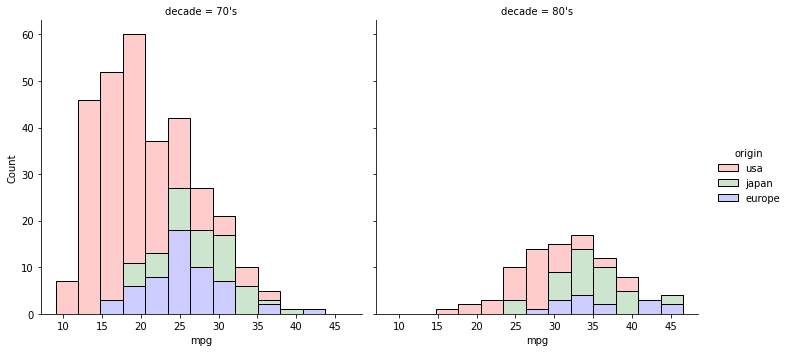

In [49]:
# use 'col' argument to create 'small multiples'

sns.displot(
data=mpg,
x='mpg',
col='decade',
hue='origin',
palette=['r','g','b'],
multiple='stack',
alpha=0.2)

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

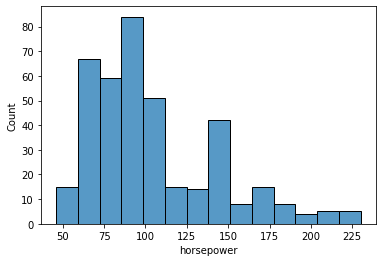

In [51]:
#histplot will return an axes level object
sns.histplot(data=mpg,
            x='horsepower')

---
<div class="alert alert-block alert-info">
    
### **Categorical Plots**

#### Boxplots

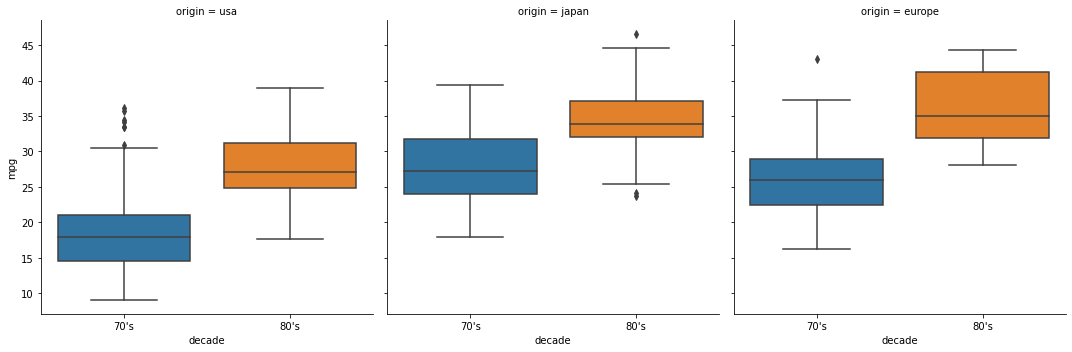

In [55]:
sns.catplot(
data=mpg,
x='decade',
y='mpg',
kind='box',
col='origin')

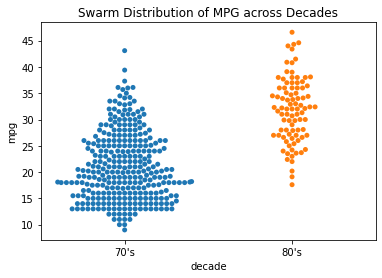

In [60]:
sns.swarmplot(
data=mpg,
x='decade',
y='mpg')
plt.title('Swarm Distribution of MPG across Decades')
plt.annotate('hi',(0,5))
plt.show()

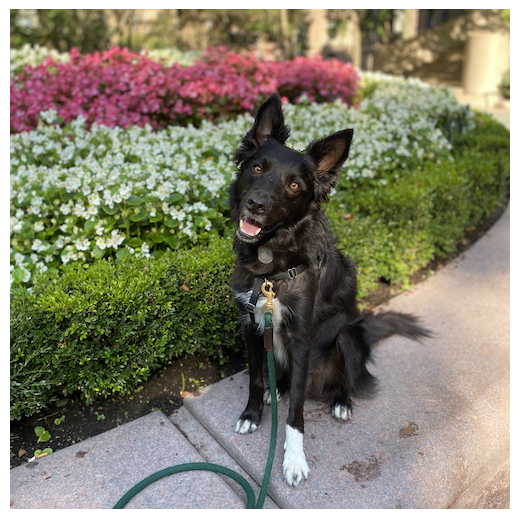

In [62]:
sns.dogplot()

---
<div class="alert alert-block alert-info">
    
### **Subplots**

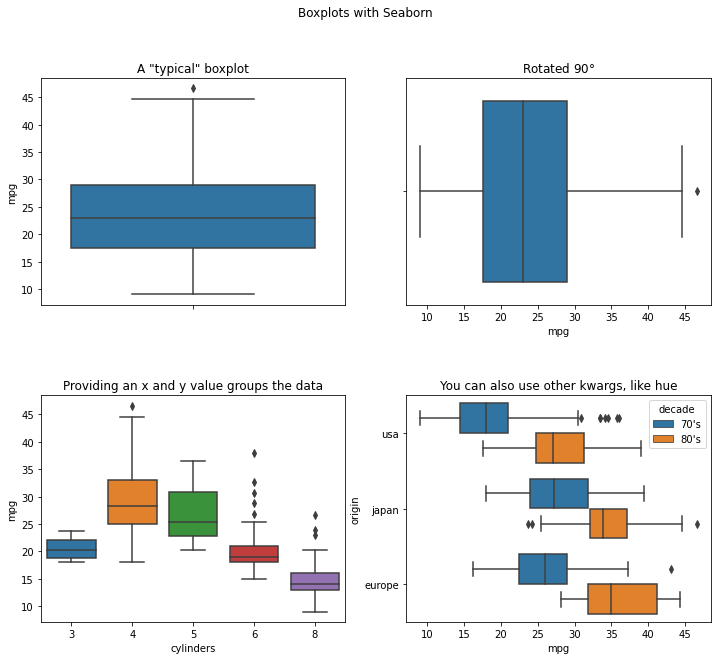

In [63]:
# specify my figure and my figsize
plt.figure(figsize=(12, 10))
# giving it a super title
# (a title for all the plots together)
plt.suptitle('Boxplots with Seaborn')

# subplot : 2X2, first plot
plt.subplot(221)
# within that spot, put a boxplot
sns.boxplot(data=mpg, y='mpg')
plt.title('A "typical" boxplot')

plt.subplot(222)
sns.boxplot(data=mpg, x='mpg')
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data=mpg, y='mpg', x='cylinders')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data=mpg, y='origin', x='mpg', hue='decade')
plt.title('You can also use other kwargs, like hue')

plt.subplots_adjust(hspace=0.4)

#### Pairplot

In [65]:
mpg.shape

(398, 10)

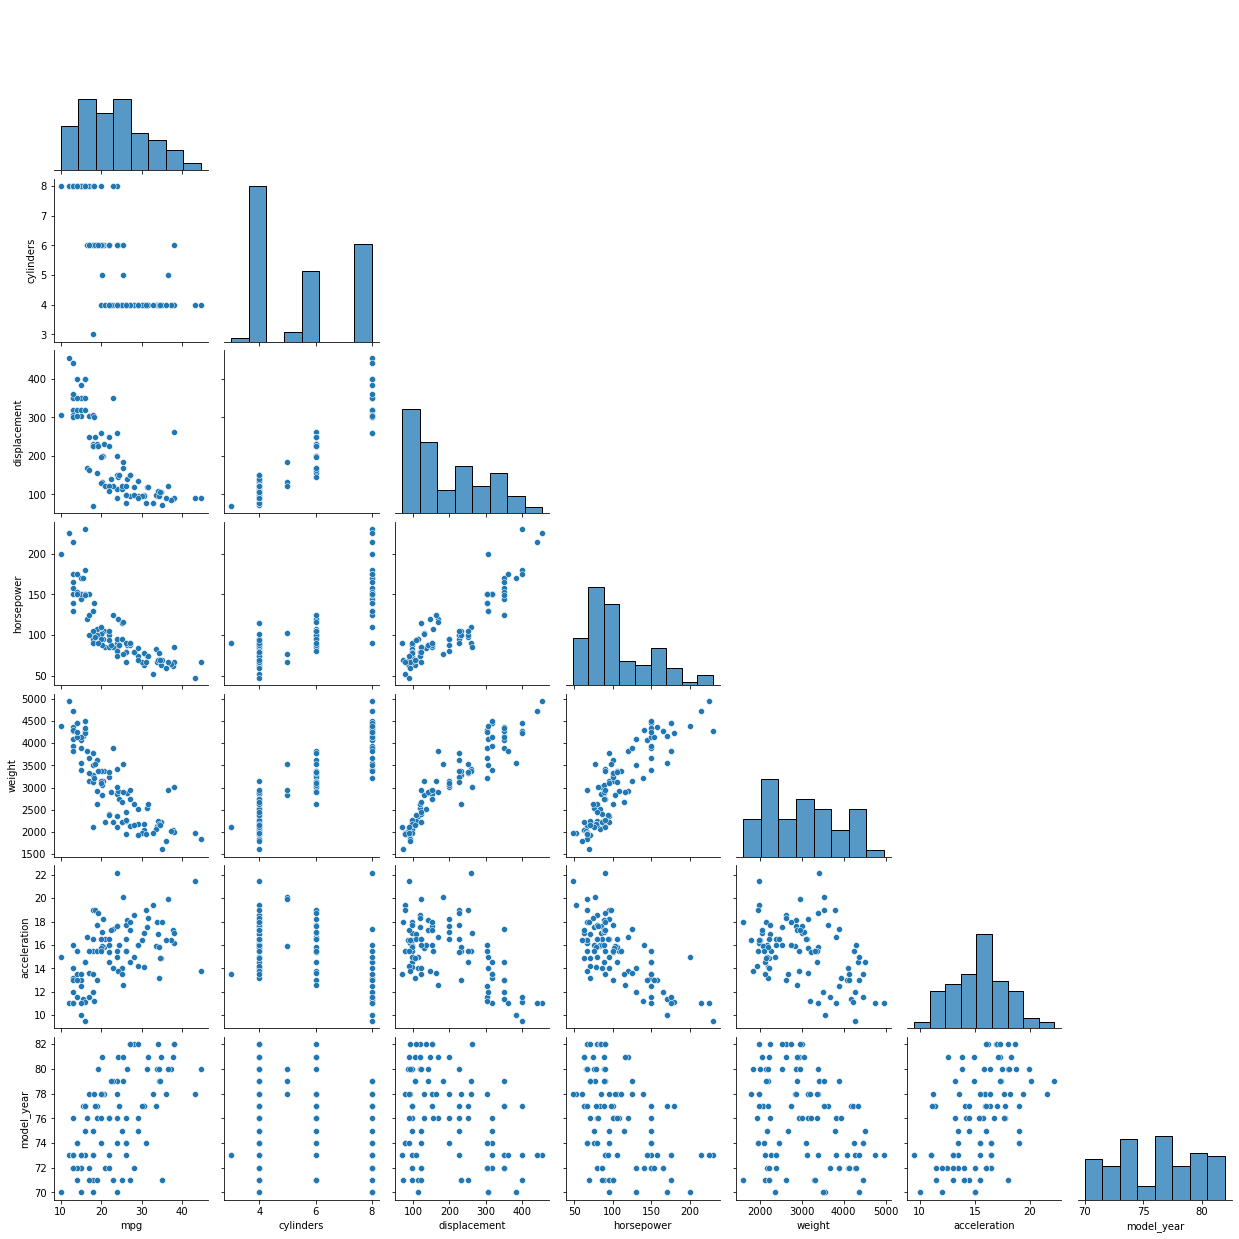

In [67]:
# pairplot is a great birds-eye of your data:
a_smaller_number = 100
sns.pairplot(mpg.sample(a_smaller_number),
            corner=True)

#### Jointplot

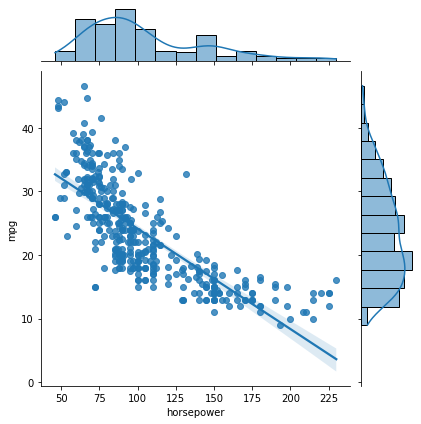

In [70]:
sns.jointplot(
data=mpg,
x='horsepower',
y='mpg',
kind='reg')

#### Heatmap

In [73]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<AxesSubplot:>

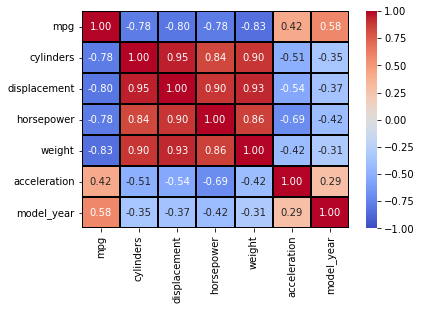

In [75]:
sns.heatmap(mpg.corr(),
           annot=True,
           cmap='coolwarm',
           vmax=1,
           vmin=-1,
           center=0,
           linewidth=1,
           linecolor='k',
           fmt='.2f')

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f